In [1]:
# a)
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) # Removing "futurewarnings" from pandas.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




college = pd.read_csv("College.csv")

college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [2]:
# b)
college2 = pd.read_csv("College.csv", index_col= 0)
college3 = college.rename({"Unnamed: 0": "College"}, axis=1)
college3 = college3.set_index("College")
college = college3
college3.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# c) using .round() to the numeric values. Makes it easier to read the data.


college3.describe().round() 


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0
mean,3002.0,2019.0,780.0,28.0,56.0,3700.0,855.0,10441.0,4358.0,549.0,1341.0,73.0,80.0,14.0,23.0,9660.0,65.0
std,3870.0,2451.0,929.0,18.0,20.0,4850.0,1522.0,4023.0,1097.0,165.0,677.0,16.0,15.0,4.0,12.0,5222.0,17.0
min,81.0,72.0,35.0,1.0,9.0,139.0,1.0,2340.0,1780.0,96.0,250.0,8.0,24.0,2.0,0.0,3186.0,10.0
25%,776.0,604.0,242.0,15.0,41.0,992.0,95.0,7320.0,3597.0,470.0,850.0,62.0,71.0,12.0,13.0,6751.0,53.0
50%,1558.0,1110.0,434.0,23.0,54.0,1707.0,353.0,9990.0,4200.0,500.0,1200.0,75.0,82.0,14.0,21.0,8377.0,65.0
75%,3624.0,2424.0,902.0,35.0,69.0,4005.0,967.0,12925.0,5050.0,600.0,1700.0,85.0,92.0,16.0,31.0,10830.0,78.0
max,48094.0,26330.0,6392.0,96.0,100.0,31643.0,21836.0,21700.0,8124.0,2340.0,6800.0,103.0,100.0,40.0,64.0,56233.0,118.0


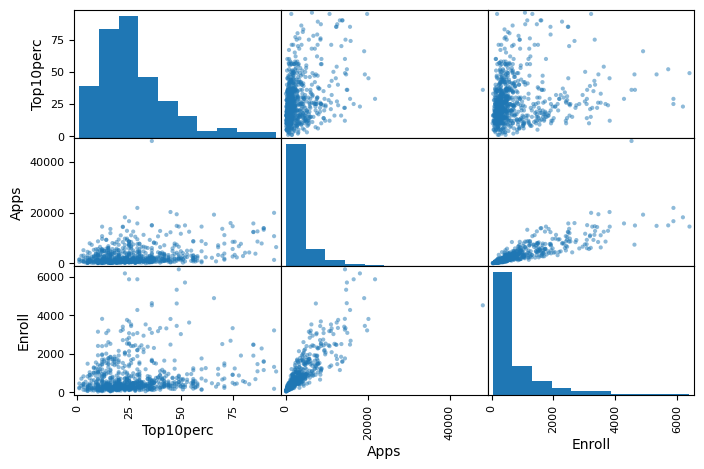

In [4]:
# d)

columns_to_plot = ["Top10perc", "Apps", "Enroll"]
pd.plotting.scatter_matrix(college3[columns_to_plot], figsize=(8,5), alpha=0.5,)

plt.show()



<Axes: ylabel='Outstate'>

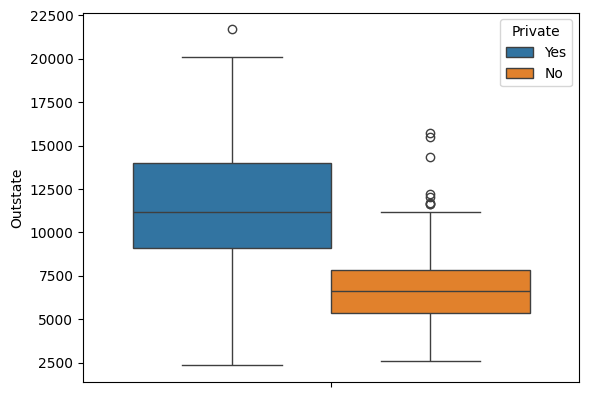

In [5]:
# e)
sns.boxplot(college3, y= "Outstate", hue="Private")


## Value count and boxplot
Using the code provided from the lab and binning/cutting "Top10perc" into two groups based on students coming from top 10% of their school exceeds 50%. 
Then I print out "Elite" with .value_counts so that we can see how many Elite universities there are. 
Finally I plot out "Outstate" versus "Elite" with a boxplot.  


Elite
No     699
Yes     78
Name: count, dtype: int64


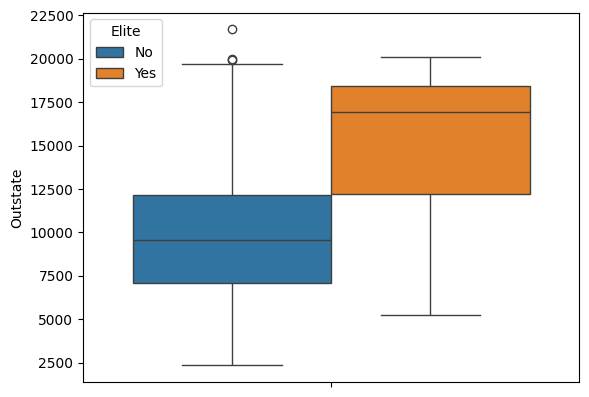

In [14]:
# f) 
college3["Elite"] = pd.cut(college3["Top10perc"], [0,50,100], labels
 =["No", "Yes"])

print(college3["Elite"].value_counts())


sns.boxplot(college3, y= "Outstate", hue="Elite")
plt.show()

## Histograms
Using subplots(2,2) to display 4 different plots, each containing different columns of quantitative data. Using tight_layout = True so it fits the subplot in a proper way, no overlaps etc. Then typing out each axis of the subplots, choosing different columns and bins. I gave each plot a different color. Differrent bins to divide the data into, ie, number of staples. I could've used a for-loop to print the plots out but this felt clearer to me at this point. 

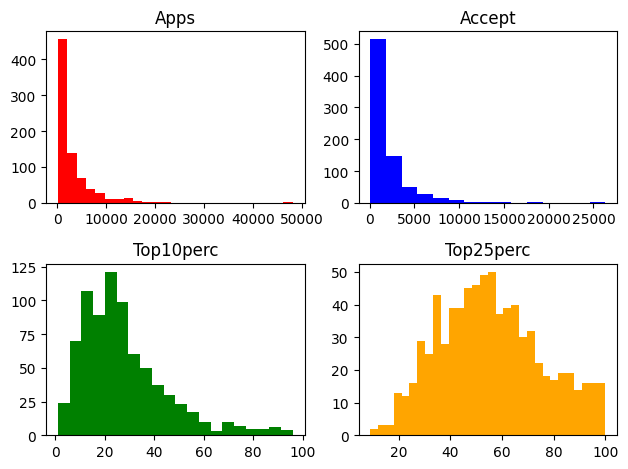

In [ ]:
# g)   can also use a for-loop for less code.
fig, ax = plt.subplots(2,2, tight_layout=True)


ax[0, 0].hist(college3["Apps"], bins=25, color= "red", alpha=1)
ax[0, 0].set_title("Apps")

ax[0, 1].hist(college3["Accept"], bins=15, color= "blue", alpha=1)
ax[0, 1].set_title("Accept")

ax[1, 0].hist(college3["Top10perc"], bins=20, color= "green", alpha=1)
ax[1, 0].set_title("Top10perc")

ax[1, 1].hist(college3["Top25perc"], bins=30, color= "orange", alpha=1)
ax[1, 1].set_title("Top25perc")

plt.show()

## Displaying and analyzing data
I import display from IPython.display to easier visualise the data at the output. 
Using .groupby and then what column i want. Using .mean() to see the average numeric values.
Finally i use round.() to round the numeric values so its easier to see the values.

In [8]:
from IPython.display import display
display(college3.groupby("Elite")[["Personal","Books"]].mean().round())

display(college3.groupby("Elite")[["Personal","Expend"]].mean().round())

display(college3.groupby("Private")[["Personal","Expend"]].mean().round())

# print(college3.groupby("Elite")[["Accept", "Grad.Rate"]].mean())
# print(college3["Private"].value_counts())

display(college3.groupby("Elite")[["Apps","Accept", "Grad.Rate"]].agg(["median", "mean"]).round())

display(college3.groupby("Private")[["Apps","Accept", "Grad.Rate"]].agg(["median", "mean"]).round())


,Personal,Books
Elite,,
No,1358.0,544.0
Yes,1188.0,595.0


,Personal,Expend
Elite,,
No,1358.0,8684.0
Yes,1188.0,18405.0


,Personal,Expend
Private,,
No,1677.0,7458.0
Yes,1214.0,10486.0


Apps          Accept         Grad.Rate      
       median    mean  median    mean    median  mean
Elite                                                
No     1420.0  2669.0  1064.0  1926.0      64.0  63.0
Yes    3849.0  5981.0  1904.0  2853.0      84.0  83.0

Apps          Accept         Grad.Rate      
         median    mean  median    mean    median  mean
Private                                                
No       4307.0  5730.0  2930.0  3919.0      55.0  56.0
Yes      1133.0  1978.0   859.0  1306.0      69.0  69.0

## Exploration of data
While continuing the exploration of the data i wanted to look for the differences in spendings by comparing if the colleges where private or not. By using groupby and mean we can easily find what we are looking for. For example, in private schools, the personal spendings seems to be lower than in public schools. However, the instructional spendings are higher.

For the Elite status i wanted to compare costs for books and also see other expenses. It shows that personal spendings are lower than none-elite but the costs for books is higher. 

I also wanted to compare Elite and Private by exploring the graduation rates, number of applications and how many that got accepted. I choose to check for both median and the average values. The graduation rates and applications seems to be higher in Elite schools. 
